In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
# categorical variables

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


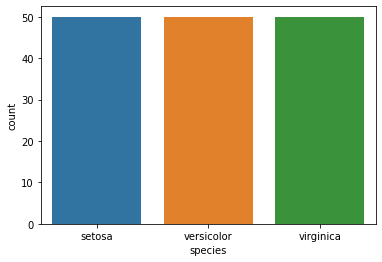

In [7]:
print(df['species'].value_counts())
sns.countplot(x='species',data=df)

In [8]:
#continuous values

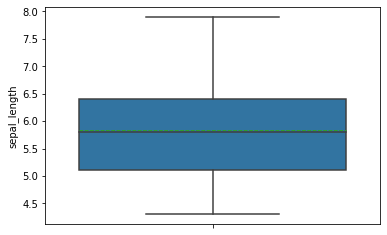

In [9]:
sns.boxplot(x="sepal_length",data=df,orient="vertical",showfliers=True,meanline=True,showmeans=True)

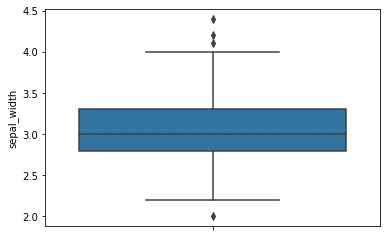

In [10]:
sns.boxplot(x="sepal_width",data=df,orient="vertical",showfliers=True,meanline=True,showmeans=True)

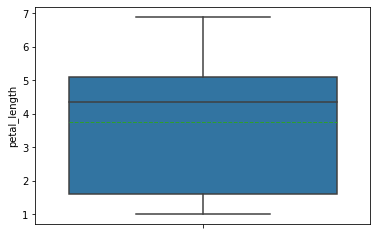

In [12]:
sns.boxplot(x="petal_length",data=df,orient="vertical",showfliers=True,meanline=True,showmeans=True)

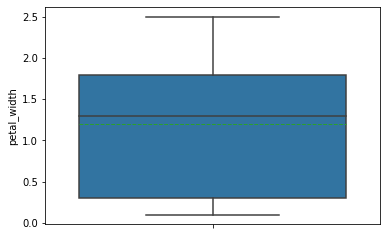

In [13]:
sns.boxplot(x="petal_width",data=df,orient="vertical",showfliers=True,meanline=True,showmeans=True)

In [16]:
#categorical v/s continuous

In [21]:
count=-1
def fun(x):
    global count
    count+=1
    return count

df['id']=df['species'].apply(fun)
df['id']

0        0
1        1
2        2
3        3
4        4
      ... 
145    145
146    146
147    147
148    148
149    149
Name: id, Length: 150, dtype: int64

In [22]:
bins=[0,2,4,6,8]
group=['small','average','big','very big']
#create a new column for income bin

In [23]:
df['sepal_length_Bin']=pd.cut(df['sepal_length'],bins,labels=group)
df['sepal_width_Bin']=pd.cut(df['sepal_width'],bins,labels=group)
df['petal_length_Bin']=pd.cut(df['petal_length'],bins,labels=group)
df['petal_width_Bin']=pd.cut(df['petal_width'],bins,labels=group)

In [24]:
d=df.groupby(by=['species','sepal_length'],as_index=False)['id'].count()
d
d.rename(columns={'id':'Count'} , inplace=True)

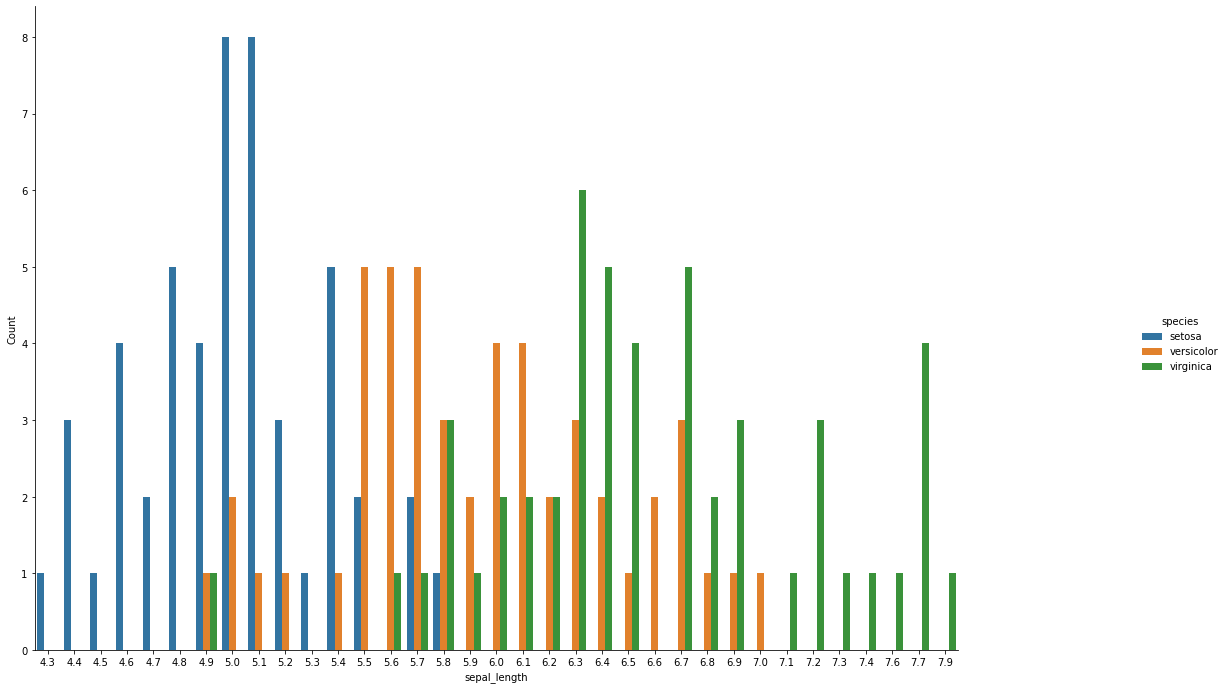

In [27]:
sns.catplot(x='sepal_length',y='Count',hue='species',data=d,kind='bar')
plt.gcf().set_size_inches(18.5, 10.5)

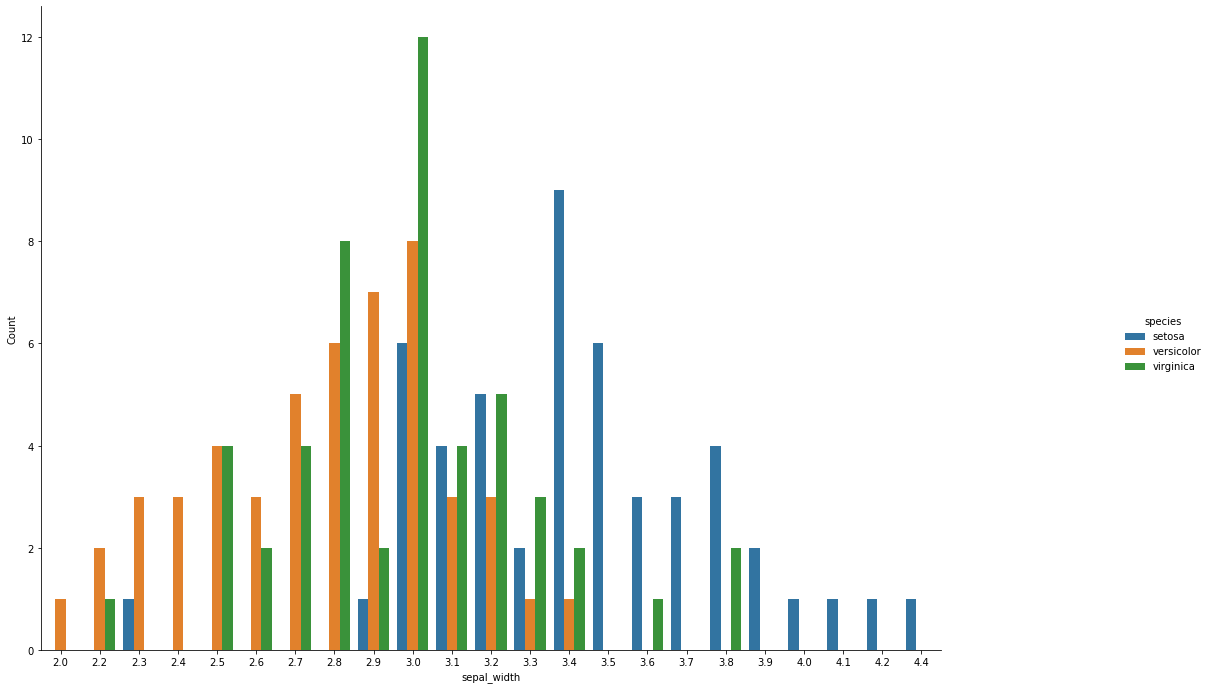

In [30]:
d=df.groupby(by=['species','sepal_width'],as_index=False)['id'].count()
d
d.rename(columns={'id':'Count'} , inplace=True)
sns.catplot(x='sepal_width',y='Count',hue='species',data=d,kind='bar')
plt.gcf().set_size_inches(18.5, 10.5)

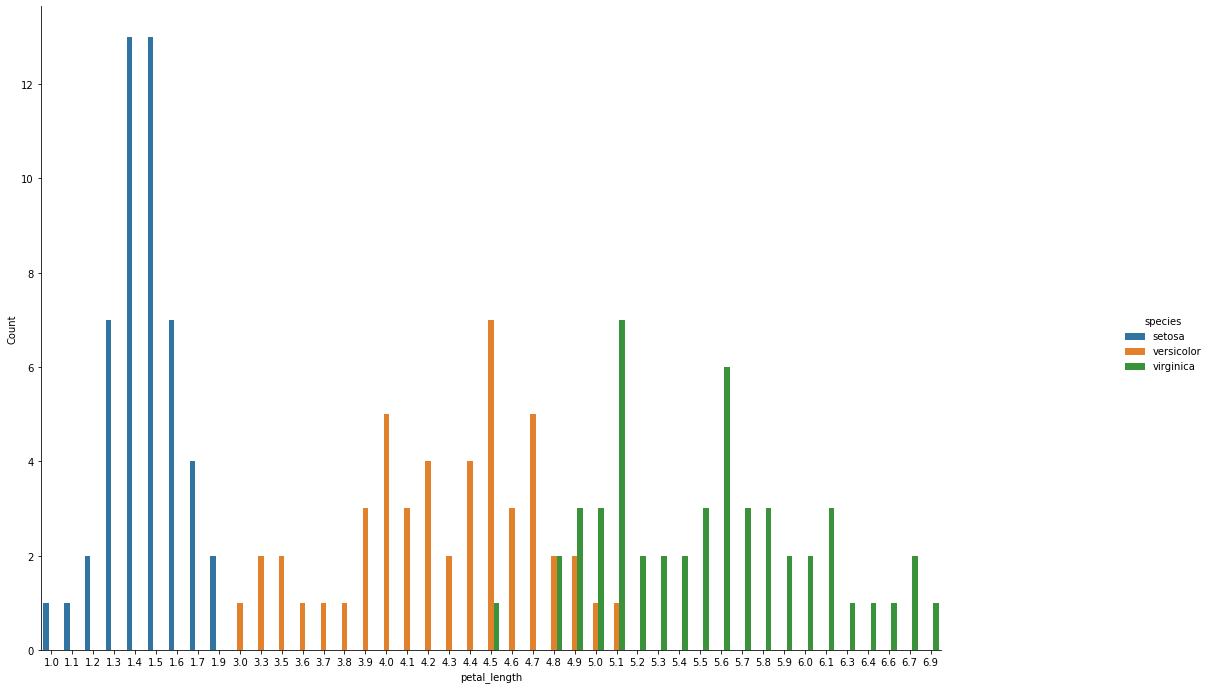

In [28]:
d=df.groupby(by=['species','petal_length'],as_index=False)['id'].count()
d
d.rename(columns={'id':'Count'} , inplace=True)
sns.catplot(x='petal_length',y='Count',hue='species',data=d,kind='bar')
plt.gcf().set_size_inches(18.5, 10.5)

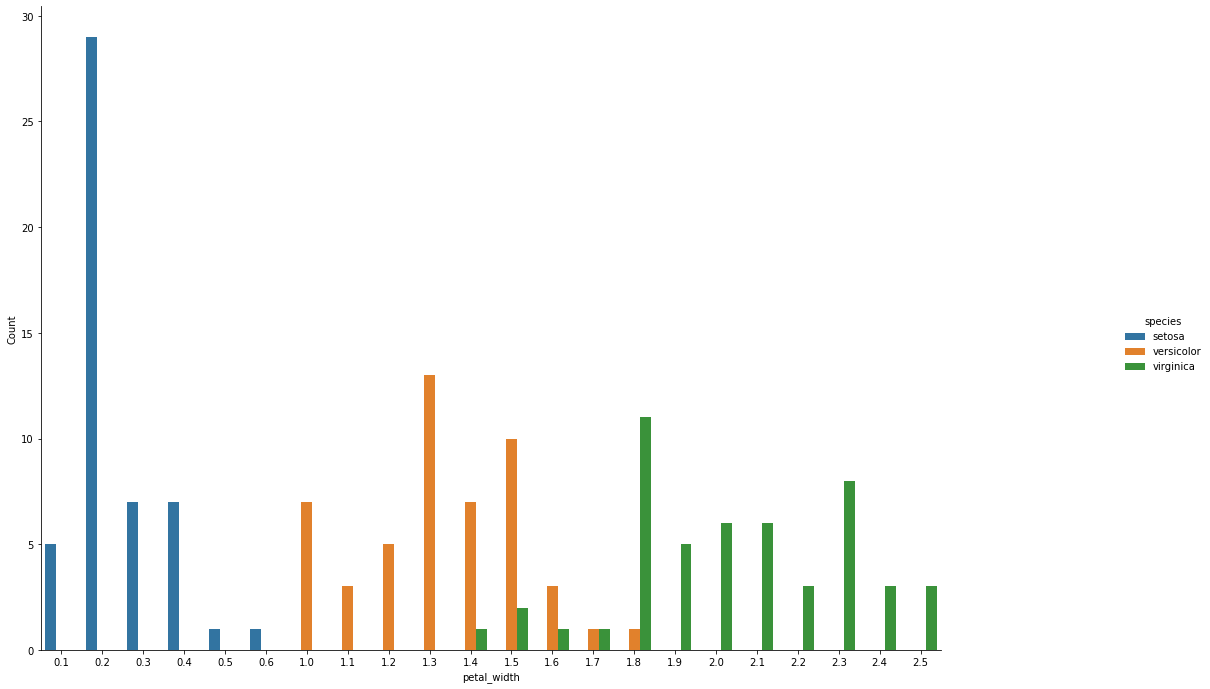

In [29]:
d=df.groupby(by=['species','petal_width'],as_index=False)['id'].count()
d
d.rename(columns={'id':'Count'} , inplace=True)
sns.catplot(x='petal_width',y='Count',hue='species',data=d,kind='bar')
plt.gcf().set_size_inches(18.5, 10.5)

In [33]:
#bivariate analysis

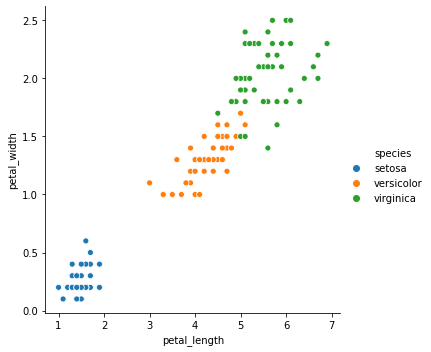

In [31]:
sns.relplot(x='petal_length',y='petal_width',hue='species',data=df,ci=False)

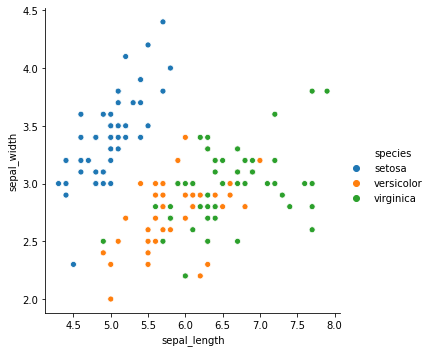

In [32]:
sns.relplot(x='sepal_length',y='sepal_width',hue='species',data=df,ci=False)

In [34]:
# wrangling

In [36]:
s=df.isnull().sum()


In [37]:
s

sepal_length        0
sepal_width         0
petal_length        0
petal_width         0
species             0
sepal_length_Bin    0
sepal_width_Bin     0
petal_length_Bin    0
petal_width_Bin     0
id                  0
dtype: int64

In [38]:
# handle outliers

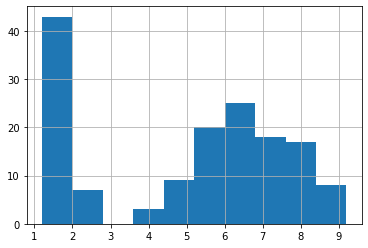

In [41]:
df['petal_length_width']=df['petal_length']+df['petal_width']
df['petal_length_width'].hist(bins=10)

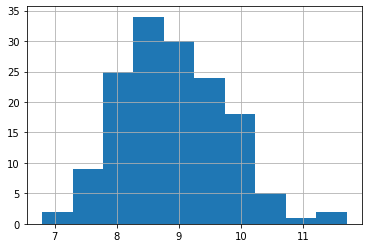

In [42]:
df['sepal_length_width']=df['sepal_length']+df['sepal_width']
df['sepal_length_width'].hist(bins=10)

In [43]:
df['petal_length_width_log']=np.log(df['petal_length_width'])
df['sepal_length_width_log']=np.log(df['sepal_length_width'])

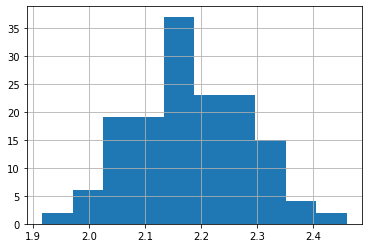

In [44]:
df['sepal_length_width_log'].hist(bins=10)

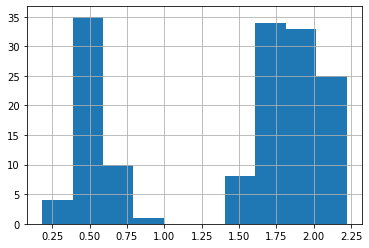

In [49]:
df['petal_length_width_log'].hist(bins=10) # This still isn't a normal grpah but yeah taking log has atleast spread out this graph

In [46]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_Bin,sepal_width_Bin,petal_length_Bin,petal_width_Bin,id,petal_length_width,sepal_length_width,petal_length_width_log,sepal_length_width_log
0,5.1,3.5,1.4,0.2,setosa,big,average,small,small,0,1.6,8.6,0.470004,2.151762
1,4.9,3.0,1.4,0.2,setosa,big,average,small,small,1,1.6,7.9,0.470004,2.066863
2,4.7,3.2,1.3,0.2,setosa,big,average,small,small,2,1.5,7.9,0.405465,2.066863
3,4.6,3.1,1.5,0.2,setosa,big,average,small,small,3,1.7,7.7,0.530628,2.041220
4,5.0,3.6,1.4,0.2,setosa,big,average,small,small,4,1.6,8.6,0.470004,2.151762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,very big,average,big,average,145,7.5,9.7,2.014903,2.272126
146,6.3,2.5,5.0,1.9,virginica,very big,average,big,small,146,6.9,8.8,1.931521,2.174752
147,6.5,3.0,5.2,2.0,virginica,very big,average,big,small,147,7.2,9.5,1.974081,2.251292
148,6.2,3.4,5.4,2.3,virginica,very big,average,big,average,148,7.7,9.6,2.041220,2.261763


In [47]:
df=df.drop(['sepal_length','sepal_width','petal_length','petal_width','petal_length_width','sepal_length_width'],axis=1)

In [48]:
df

,species,sepal_length_Bin,sepal_width_Bin,petal_length_Bin,petal_width_Bin,id,petal_length_width_log,sepal_length_width_log
0,setosa,big,average,small,small,0,0.470004,2.151762
1,setosa,big,average,small,small,1,0.470004,2.066863
2,setosa,big,average,small,small,2,0.405465,2.066863
3,setosa,big,average,small,small,3,0.530628,2.041220
4,setosa,big,average,small,small,4,0.470004,2.151762
...,...,...,...,...,...,...,...,...
145,virginica,very big,average,big,average,145,2.014903,2.272126
146,virginica,very big,average,big,small,146,1.931521,2.174752
147,virginica,very big,average,big,small,147,1.974081,2.251292
148,virginica,very big,average,big,average,148,2.041220,2.261763


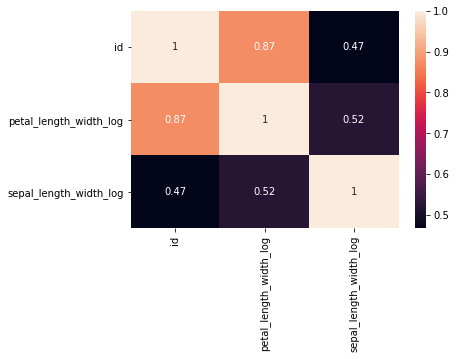

In [50]:
sns.heatmap(df.corr(),annot=True)

In [51]:
df.to_csv('final_df.csv',index=False)
df1=pd.read_csv('final_df.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 150 non-null    object 
 1   sepal_length_Bin        150 non-null    object 
 2   sepal_width_Bin         150 non-null    object 
 3   petal_length_Bin        150 non-null    object 
 4   petal_width_Bin         150 non-null    object 
 5   id                      150 non-null    int64  
 6   petal_length_width_log  150 non-null    float64
 7   sepal_length_width_log  150 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 9.5+ KB
